In [1]:
# change directory to the working folder
import os
os.getcwd()
os.chdir("/Users/Ola/Dropbox (MIT)/FinalProject/DATA FILES")

In [2]:
# load the PI list of interest
import pandas as pd
from IPython.display import display

pidata = pd.read_excel('faculty_list.xlsx',sep=',',header=None).values
pidata

array([['AU=Abbott, Gerald or'],
       ['AU=Abbott, William or'],
       ['AU=Abdi, Reza or'],
       ..., 
       ['AU=Zusman, Randall or'],
       ['AU=Zwicker, Jeffrey or'],
       ['AU=Zygmanski, Piotr']], dtype=object)

In [3]:
# preprocessing: remove "AU=", " or", "[]" from each string
# all lower cases
pilist = []
for x in range(0, len(pidata)):
    pilist.append(str(pidata[x]).replace('AU=','').replace(' or','').replace('[','').replace(']','').strip('\'').lower())
pilist

['abbott, gerald',
 'abbott, william',
 'abdi, reza',
 'abel, gregory',
 'ablon, john',
 'abookire, susan',
 'abraczinskas, diane',
 'abraham, melissa',
 'abraham, stephen',
 'abrahamson, martin',
 'abrahm, janet',
 'abrams, annah',
 'abrams, dominic',
 'abrams, thomas',
 'abramson, jeremy',
 'abujudeh, hani',
 'acar, diler',
 'acker, david',
 'ackerman, jerome',
 'ackerman, kathryn',
 'ackerman, marc',
 'ackerman, robert',
 'ackman, jeanne',
 'adam, rosalyn',
 'adami, hans-olov',
 'adamkiewicz, gary',
 'adams, douglass',
 'adams, joe',
 'adelstein, s.',
 'adil, eelam',
 'adler, gail',
 'aerts, hugo',
 'afdhal, nezam',
 'agar, nathalie',
 'agarwal, suneet',
 'agenor, madina',
 'aglio, linda',
 'agrawal, pankaj',
 'aguirre, blaise',
 'agus, michael',
 'ahern, david',
 'ahlfors, seppo',
 'ahmed, muneeb',
 'ahmed, shihab',
 'ahn, andrew',
 'ahnallen, christopher',
 'ahveninen, jyrki',
 'aiello, lloyd',
 'aikawa, elena',
 'aikawa, masanori',
 'aird, william',
 'aisiku, imoigele',
 'akin, c

In [5]:
len(pilist)

5024

In [2]:
import pandas as pd
from IPython.display import display

#pidata = pd.read_excel('faculty_list.xlsx',sep=',',header=None).values
pilist = pd.read_csv('allnodes.csv',sep=',',header=None).values

In [3]:
litdata = pd.read_csv('publicationsince2003.txt', sep='\t').values
litdata

/Users/Ola/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array([[ 'The next generation of scenarios for climate change research and assessment',
        'Moss, Richard H.; Edmonds, Jae A.; Hibbard, Kathy A.; Manning, Martin R.; Rose, Steven K.; van Vuuren, Detlef P.; Carter, Timothy R.; Emori, Seita; Kainuma, Mikiko; Kram, Tom; Meehl, Gerald A.; Mitchell, John F. B.; Nakicenovic, Nebojsa; Riahi, Keywan; Smith, Steven J.; Stouffer, Ronald J.; Thomson, Allison M.; Weyant, John P.; Wilbanks, Thomas J.',
        nan, ..., 347, 369, 334],
       [ 'The WCRP CMIP3 multimodel dataset - A new era in climate change research',
        'Meehl, Gerald A.; Covey, Curt; Delworth, Thomas; Latif, Mojib; McAvaney, Bryant; Mitchell, John F. B.; Stouffer, Ronald J.; Taylor, Karl E.',
        nan, ..., 185, 141, 87],
       [ 'Genotypic and Histological Evolution of Lung Cancers Acquiring Resistance to EGFR Inhibitors',
        'Sequist, Lecia V.; Waltman, Belinda A.; Dias-Santagata, Dora; Digumarthy, Subba; Turke, Alexa B.; Fidias, Panos; Bergethon, Kristin; S

In [5]:
#litdata[3]
#litdata[0,19]  citation is col 20
#import hIndexnew as h1
#hIndxList = []
citCount = []
for item in pilist[0:4]:
    #for each PI, check their papers.
    itemCitationList=[]
    for paper,value in enumerate(litdata): #go through all papers
        paperAuthors = litdata[:,1][paper]   #gets author list of ith paper
        if(isinstance(paperAuthors, float)):  # skip abnormal rows (e.g., float)
            continue
        paperAuthors = paperAuthors.lower().split('; ')  # all lower cases
        if item in paperAuthors:  #if author item wrote the paper, get citation and append
            itemCitation = litdata[paper,19]
            itemCitationList.append(itemCitation)
    #end of going through all papers, now compute h-index for author using itemCitationList
    #print(itemCitationList)
    itemCitationList = [ int(x) for x in itemCitationList]
    citCountval = sum(itemCitationList)
    citCount.append(citCountval)
    #hIndxValue = h1.hIndex(itemCitationList)
    #hIndxList.append(hIndxValue)
#hIndxList  #final list of h-indexes. Should be printed to something.   
citCount           

[1437, 470, 0, 0]

In [ ]:
print(pilist[0:4])

In [8]:
ade=litdata[:,1][3]  #tells us the authors of the 4th paper. We wanna check if authorship increases throughout
import hIndexnew as h2
ade=[5, 6, 7, 8, 7, 4, 5, 7]
h2.hIndex(ade)

5

In [7]:
import hIndexnew as h2
ade=[5, 6, 7, 8, 7, 4, 5, 7]
h2.hIndex(ade)

5

In [66]:
# extracting authors
authors = []
for x in range(0, len(litdata)):
    authors.append(litdata[:][x][1])
authors

['Moss, Richard H.; Edmonds, Jae A.; Hibbard, Kathy A.; Manning, Martin R.; Rose, Steven K.; van Vuuren, Detlef P.; Carter, Timothy R.; Emori, Seita; Kainuma, Mikiko; Kram, Tom; Meehl, Gerald A.; Mitchell, John F. B.; Nakicenovic, Nebojsa; Riahi, Keywan; Smith, Steven J.; Stouffer, Ronald J.; Thomson, Allison M.; Weyant, John P.; Wilbanks, Thomas J.',
 'Meehl, Gerald A.; Covey, Curt; Delworth, Thomas; Latif, Mojib; McAvaney, Bryant; Mitchell, John F. B.; Stouffer, Ronald J.; Taylor, Karl E.',
 'Sequist, Lecia V.; Waltman, Belinda A.; Dias-Santagata, Dora; Digumarthy, Subba; Turke, Alexa B.; Fidias, Panos; Bergethon, Kristin; Shaw, Alice T.; Gettinger, Scott; Cosper, Arjola K.; Akhavanfard, Sara; Heist, Rebecca S.; Temel, Jennifer; Christensen, James G.; Wain, John C.; Lynch, Thomas J.; Vernovsky, Kathy; Mark, Eugene J.; Lanuti, Michael; Iafrate, A. John; Mino-Kenudson, Mari; Engelman, Jeffrey A.',
 'Shaw, Alice T.; Yeap, Beow Y.; Mino-Kenudson, Mari; Digumarthy, Subba R.; Costa, Daniel

In [ ]:
for x in range(0, len(authors)):
    if(isinstance(authors[x], float)):  # skip abnormal rows (e.g., float)
        continue
    row = authors[x].lower().split('; ')  # all lower cases

In [18]:
# construct author network
import itertools
import networkx as nx
import re

g = nx.Graph()

# add nodes and edges by checking conditions
ind = [] # record of all papers with more than two authors in the PI list
edgetot = []
nodetot = []
for x in range(0, len(authors)):
    if(isinstance(authors[x], float)):  # skip abnormal rows (e.g., float)
        continue
    row = authors[x].lower().split('; ')  # all lower cases
    all = []
    for y in range(0, len(row)):
        dt = re.sub(' [a-z]\.$','',row[y]) # remove the middle initial in the end if any
        dt = re.sub(' [a-z]\.$','',dt)  # do it twice since some have two middle initials
        all.append(dt)
    allnodes = [item for item in all if item in pilist]
    nodenames = list(set(allnodes))
    if nodenames != []:
        nodetot = nodetot + nodenames
    if(len(nodenames)>=2):
        ind.append(x);
    alledges = itertools.combinations(allnodes[:], 2)
    edgenames = list(alledges)
    if edgenames != []:
        edgetot = edgetot + edgenames

NameError: name 'authors' is not defined

In [9]:
from itertools import groupby
freq = [len(list(group)) for key, group in groupby(edgetot)]
names = [key for key, group in groupby(edgetot)]

In [10]:
for i in range(0,len(freq)):
    if freq[i] == 18:
        print(i)

404516
759155


In [11]:
import numpy as np
np.max(freq)

18

In [12]:
names[759155]

('suit, herman', 'loeffler, jay')

In [13]:
names[404516]

('suit, herman', 'loeffler, jay')

In [14]:
edges = []
for i in range(0,len(names)):
    edges.append(names[i]+(freq[i],))
edges

[('sequist, lecia', 'dias-santagata, dora', 1),
 ('sequist, lecia', 'digumarthy, subba', 1),
 ('sequist, lecia', 'shaw, alice', 1),
 ('sequist, lecia', 'heist, rebecca', 1),
 ('sequist, lecia', 'temel, jennifer', 1),
 ('sequist, lecia', 'wain, john', 1),
 ('sequist, lecia', 'mark, eugene', 1),
 ('sequist, lecia', 'lanuti, michael', 1),
 ('sequist, lecia', 'mino-kenudson, mari', 1),
 ('sequist, lecia', 'engelman, jeffrey', 1),
 ('dias-santagata, dora', 'digumarthy, subba', 1),
 ('dias-santagata, dora', 'shaw, alice', 1),
 ('dias-santagata, dora', 'heist, rebecca', 1),
 ('dias-santagata, dora', 'temel, jennifer', 1),
 ('dias-santagata, dora', 'wain, john', 1),
 ('dias-santagata, dora', 'mark, eugene', 1),
 ('dias-santagata, dora', 'lanuti, michael', 1),
 ('dias-santagata, dora', 'mino-kenudson, mari', 1),
 ('dias-santagata, dora', 'engelman, jeffrey', 1),
 ('digumarthy, subba', 'shaw, alice', 1),
 ('digumarthy, subba', 'heist, rebecca', 1),
 ('digumarthy, subba', 'temel, jennifer', 1),
 

In [15]:
nodestoadd = list(set(nodetot))
len(nodestoadd)

5024

In [16]:
edgestoadd = list(set(edges))
len(edgestoadd)

76216

In [17]:
g.add_nodes_from(nodestoadd)
g.add_weighted_edges_from(edgestoadd)

In [9]:
nx.info(g) # the full graph

'Name: \nType: Graph\nNumber of nodes: 5024\nNumber of edges: 61534\nAverage degree:  24.4960'

In [10]:
# remove self loops if any
self_loops = []
for entry in g.edges():
    if entry[0] == entry[1]:
        self_loops.append(entry)

g.remove_edges_from(self_loops)
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 5024\nNumber of edges: 61534\nAverage degree:  24.4960'

In [59]:
import community
import matplotlib.pyplot as plt

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
G = g

#first compute the best partition
partition = community.best_partition(G)

In [88]:
list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == 2]
len(list_nodes)

4768

In [67]:
k = g.subgraph(list_nodes)
nx.info(k)

'Name: \nType: Graph\nNumber of nodes: 710\nNumber of edges: 9052\nAverage degree:  25.4986'

In [89]:
k.nodes()

['salazar, gloria',
 'shi, yang',
 'yagi, yukako',
 'reed, robin',
 'wo, jennifer',
 'garnick, marc',
 'beglova, natalia',
 'mckenna, shannon',
 'park, peter',
 'marks, stephen',
 'lubitz, carrie',
 'dahl, douglas',
 'signoretti, sabina',
 'lawler, jack',
 'boyce, frederick',
 'gaz, randall',
 'knoechel, birgit',
 'janeway, katherine',
 'faquin, william',
 'nakatani, yoshihiro',
 'ott, patrick',
 'oxnard, geoffrey',
 'rinn, john',
 'pardee, arthur',
 'doyle, leona',
 'engelman, jeffrey',
 'hogle, james',
 'jo, vickie',
 'simeone, joseph',
 'byrne, thomas',
 'federman, daniel',
 'correia, john',
 'french, christopher',
 'langenau, david',
 'martuza, robert',
 'pomeroy, scott',
 'huberman, mark',
 'clancy, thomas',
 'hochedlinger, konrad',
 'mcloud, theresa',
 'brink, james',
 'lathan, christopher',
 'iafrate, anthony',
 'axelrod, lloyd',
 'lyatskaya, yulia',
 'harshman, lauren',
 'gee, michael',
 'berry, donna',
 'mortele, koenraad',
 'benacerraf, beryl',
 'zhao, jean',
 'rabin, michael

In [71]:
kedges = k.edges()
kedges

[('salazar, gloria', 'sharma, amita'),
 ('salazar, gloria', 'shipp, thomas'),
 ('salazar, gloria', 'gilman, matthew'),
 ('salazar, gloria', 'alkasab, tarik'),
 ('salazar, gloria', 'harris, robert'),
 ('salazar, gloria', 'pandharipande, pari'),
 ('salazar, gloria', 'shepard, jo-anne'),
 ('shi, yang', 'park, peter'),
 ('shi, yang', 'rinn, john'),
 ('shi, yang', 'hochedlinger, konrad'),
 ('shi, yang', 'greer, eric'),
 ('shi, yang', 'elledge, stephen'),
 ('shi, yang', 'inuzuka, hiroyuki'),
 ('shi, yang', 'wei, wenyi'),
 ('shi, yang', 'novina, carl'),
 ('shi, yang', 'roberts, thomas'),
 ('shi, yang', 'king, randall'),
 ('shi, yang', 'whetstine, johnathan'),
 ('shi, yang', 'yankner, bruce'),
 ('shi, yang', 'kingston, robert'),
 ('shi, yang', 'puigserver, pere'),
 ('shi, yang', 'lian, christine'),
 ('shi, yang', 'colaiacovo, monica'),
 ('shi, yang', 'zou, lee'),
 ('shi, yang', 'haas, wilhelm'),
 ('shi, yang', 'moazed, danesh'),
 ('shi, yang', 'chowdhury, dipanjan'),
 ('shi, yang', 'buratowski

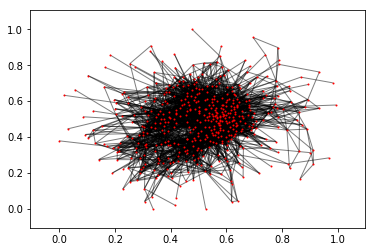

In [62]:
#drawing
pos = nx.spring_layout(k)  #spring, random, shell
nx.draw_networkx_nodes(k, pos, node_size = 1)

nx.draw_networkx_edges(k, pos, alpha=0.5)
plt.show()

In [43]:
# first community
ind = [i for i, e in enumerate(keylist) if e in list_nodes]

In [55]:
count = 0.
comsize = {}
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    comsize[count] = len(list_nodes)

In [56]:
comsize

{1.0: 710,
 2.0: 475,
 3.0: 1,
 4.0: 649,
 5.0: 1,
 6.0: 550,
 7.0: 571,
 8.0: 227,
 9.0: 99,
 10.0: 656,
 11.0: 1,
 12.0: 336,
 13.0: 238,
 14.0: 247,
 15.0: 1,
 16.0: 1,
 17.0: 1,
 18.0: 1,
 19.0: 1,
 20.0: 1,
 21.0: 1,
 22.0: 1,
 23.0: 1,
 24.0: 1,
 25.0: 1,
 26.0: 1,
 27.0: 1,
 28.0: 3,
 29.0: 1,
 30.0: 1,
 31.0: 1,
 32.0: 1,
 33.0: 1,
 34.0: 1,
 35.0: 1,
 36.0: 1,
 37.0: 1,
 38.0: 1,
 39.0: 1,
 40.0: 1,
 41.0: 1,
 42.0: 1,
 43.0: 1,
 44.0: 1,
 45.0: 1,
 46.0: 1,
 47.0: 1,
 48.0: 1,
 49.0: 1,
 50.0: 1,
 51.0: 1,
 52.0: 1,
 53.0: 1,
 54.0: 1,
 55.0: 3,
 56.0: 1,
 57.0: 1,
 58.0: 1,
 59.0: 1,
 60.0: 1,
 61.0: 1,
 62.0: 1,
 63.0: 1,
 64.0: 1,
 65.0: 1,
 66.0: 1,
 67.0: 1,
 68.0: 1,
 69.0: 1,
 70.0: 1,
 71.0: 1,
 72.0: 2,
 73.0: 1,
 74.0: 1,
 75.0: 1,
 76.0: 1,
 77.0: 1,
 78.0: 1,
 79.0: 1,
 80.0: 1,
 81.0: 1,
 82.0: 1,
 83.0: 1,
 84.0: 1,
 85.0: 1,
 86.0: 1,
 87.0: 1,
 88.0: 2,
 89.0: 1,
 90.0: 1,
 91.0: 1,
 92.0: 1,
 93.0: 1,
 94.0: 1,
 95.0: 1,
 96.0: 1,
 97.0: 1,
 98.0: 1,
 99.0: 1

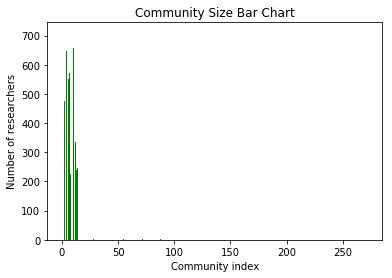

In [24]:
import matplotlib.pyplot as plt

plt.bar(list(comsize.keys()), comsize.values(), color='g')
plt.title("Community Size Bar Chart")
plt.ylabel("Number of researchers")
plt.xlabel("Community index")
plt.show()
# comment: we might want to associate the community number with the corresponding research field

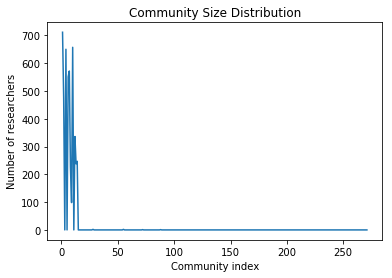

In [25]:
import matplotlib.pylab as plt

lists = sorted(comsize.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.title("Community Size Distribution")
plt.ylabel("Number of researchers")
plt.xlabel("Community index")

plt.plot(x, y)
plt.show()

In [64]:
lists

[(1.0, 710),
 (2.0, 475),
 (3.0, 649),
 (4.0, 550),
 (5.0, 571),
 (6.0, 227),
 (7.0, 99),
 (8.0, 656),
 (9.0, 336),
 (10.0, 238),
 (11.0, 247),
 (12.0, 3),
 (13.0, 3),
 (14.0, 2),
 (15.0, 2)]

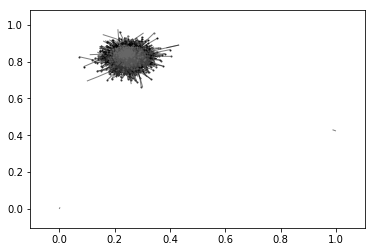

In [19]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)  #spring, random, shell
count = 0
#for com in set(partition.values()) :
for com in {0,1,2,3,4,5}:
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 1, node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [30]:
# largest connected component
Gc = max(nx.connected_component_subgraphs(G), key=len)

In [31]:
nx.info(Gc)

'Name: \nType: Graph\nNumber of nodes: 4764\nNumber of edges: 61532\nAverage degree:  25.8321'

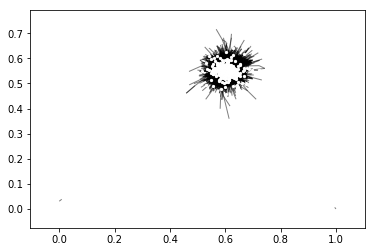

In [32]:
pos = nx.spring_layout(G)

# second largest community
list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == 1]
nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 5,node_color = str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [33]:
len(list_nodes)

475

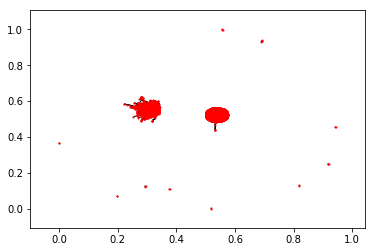

In [208]:
import matplotlib
import matplotlib.pyplot as plt
 
# plot the author network
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_color='r',node_size = 1)
#nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edges(g, pos, edge_color='k', arrows=True)

plt.show()

In [8]:
# summary of network
import networkx as nx
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 5024\nNumber of edges: 61534\nAverage degree:  24.4960'

In [57]:
# remove all nodes that have degree == 0
deg = g.degree()
to_remove = [n for n in deg if deg[n] == 0]
#g.degree(to_remove)
g.remove_nodes_from(to_remove)
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 4768\nNumber of edges: 61534\nAverage degree:  25.8112'

In [58]:
to_remove

['simon, bennett',
 'gilkey, melissa',
 'silva, denise',
 'pecot, matthew',
 'gibbons, patricia',
 'tachado, souvenir',
 'prakash, kavitha',
 'thompson, b.',
 'giddon, donald',
 'coles, robert',
 'apiou, gabriela',
 'bernhard, william',
 'hartley, l',
 'glick, thomas',
 'rubenstein, mitchell',
 'martin, maurice',
 'goldman, beth',
 'vacanti, francis',
 'samples, cathryn',
 'margulies, alfred',
 'burns, charles',
 'collier, r.',
 'janett, robert',
 'bernad, jorge',
 'maktabi, mazen',
 'szymanski, ludwik',
 'brown, herbert',
 'patel, dinesh',
 'barnett, g',
 'gobel, verena',
 'kazemi, homayoun',
 'hsiao, william',
 'goodson, john',
 'knapp, robert',
 'keutmann, henry',
 'allen, eliezer',
 'alikhani, mani',
 'jean-baptiste, marie-louise',
 'castillo, carlos',
 'tabb, kevin',
 'greenough, paul',
 'philip, james',
 'moyer, patricia',
 'hay, donald',
 'shein, david',
 'scott, r',
 'pliskin, joseph',
 'shannon, daniel',
 'kehoe, laura',
 'kannam, joseph',
 'steer, michael',
 'vasile, russell'

In [16]:
cycles = nx.find_cycle(g)
cycles

[('willett, walter', 'curhan, gary'),
 ('curhan, gary', 'mattei, josiemer'),
 ('mattei, josiemer', 'willett, walter')]

In [17]:
len(self_loops)

NameError: name 'self_loops' is not defined

In [38]:
def plot_degree_distribution():
    degs = {}
    for n in g.nodes():
        deg = g.degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.plot([k for (k, v) in items], [v for (k, v) in items],'k.')
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title("Degree Distribution")
    plt.ylabel("Number of nodes")
    plt.xlabel("Degree")
    plt.show()
    fig.savefig("degree_distribution.png")

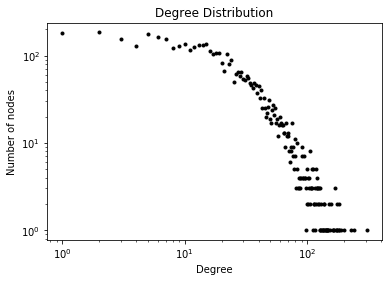

In [39]:
import matplotlib
import matplotlib.pyplot as plt

plot_degree_distribution()

In [42]:
subset_data = litdata[ind]
len(subset_data)

4404

In [41]:
import csv
with open("subset_data.csv", "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',',dialect='excel',lineterminator='\n')
        writer.writerows(subset_data)

In [63]:
adjmat = nx.adjacency_matrix(g)
adjmat

<475x475 sparse matrix of type '<class 'numpy.int64'>'
	with 9860 stored elements in Compressed Sparse Row format>

In [13]:
adjmat[1]

<1x5024 sparse matrix of type '<class 'numpy.int64'>'
	with 112 stored elements in Compressed Sparse Row format>

In [64]:
import scipy.sparse
fullmat = adjmat.todense()
#scipy.sparse.save_npz("adjacency_mat.npz",adjmat)

In [242]:
display(fullmat[6])

matrix([[0, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [37]:
import numpy as np

s = np.sum(fullmat,axis=1)
ind = [i for i in s if i>2]
ind

[matrix([[93]], dtype=int64),
 matrix([[18]], dtype=int64),
 matrix([[5]], dtype=int64),
 matrix([[3]], dtype=int64),
 matrix([[6]], dtype=int64),
 matrix([[17]], dtype=int64),
 matrix([[42]], dtype=int64),
 matrix([[13]], dtype=int64),
 matrix([[3]], dtype=int64),
 matrix([[3]], dtype=int64),
 matrix([[15]], dtype=int64),
 matrix([[17]], dtype=int64),
 matrix([[20]], dtype=int64),
 matrix([[17]], dtype=int64),
 matrix([[42]], dtype=int64),
 matrix([[4]], dtype=int64),
 matrix([[12]], dtype=int64),
 matrix([[12]], dtype=int64),
 matrix([[13]], dtype=int64),
 matrix([[20]], dtype=int64),
 matrix([[8]], dtype=int64),
 matrix([[34]], dtype=int64),
 matrix([[13]], dtype=int64),
 matrix([[27]], dtype=int64),
 matrix([[23]], dtype=int64),
 matrix([[14]], dtype=int64),
 matrix([[63]], dtype=int64),
 matrix([[15]], dtype=int64),
 matrix([[6]], dtype=int64),
 matrix([[12]], dtype=int64),
 matrix([[37]], dtype=int64),
 matrix([[65]], dtype=int64),
 matrix([[6]], dtype=int64),
 matrix([[33]], dty

In [69]:
npmat = nx.to_numpy_matrix(g)
npmat

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [73]:
diag = np.diagonal(npmat)
np.sum(diag,axis=0)

99.0

In [34]:
allnodes = g.nodes()
allnodes

['mitchell, john',
 'sequist, lecia',
 'dias-santagata, dora',
 'digumarthy, subba',
 'shaw, alice',
 'heist, rebecca',
 'temel, jennifer',
 'wain, john',
 'mark, eugene',
 'lanuti, michael',
 'mino-kenudson, mari',
 'engelman, jeffrey',
 'yeap, beow',
 'costa, daniel',
 'kobayashi, susumu',
 'rodig, scott',
 'chirieac, lucian',
 'kwak, eunice',
 'wright, alexi',
 'mack, jennifer',
 'balboni, tracy',
 'mitchell, susan',
 'jackson, vicki',
 'block, susan',
 'salic, adrian',
 'mitchison, timothy',
 'mitchell, richard',
 'clark, jeffrey',
 'jones, richard',
 'givens, jane',
 'kalaany, nada',
 'garraway, levi',
 'brachtel, elena',
 'benes, cyril',
 'barletta, justine',
 'lindeman, neal',
 'janne, pasi',
 'johnson, bruce',
 'ho, carolyn',
 'seidman, christine',
 'corcoran, ryan',
 'flaherty, keith',
 'hornick, jason',
 'cohen, david',
 'warshaw, andrew',
 'lauwers, gregory',
 'missmer, stacey',
 'tworoger, shelley',
 'spiegelman, donna',
 'barbieri, robert',
 'ramaswamy, sridhar',
 'zukerbe

In [54]:
import csv
with open("allnodes_noisolated.csv", "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',',dialect='excel',lineterminator='\n')
        for row in g.nodes():
            writer.writerow([row])
        #writer.writerows([allnodes])

In [51]:
len(g.nodes())

4768

In [46]:
allnodes[0]

'mitchell, john'

In [27]:
import csv
with open("adjacency_matrix.csv", "w") as csv_file:
        writer = csv.writer(csv_file, delimiter='\t',dialect='excel',lineterminator='\n')
        writer.writerows(adjmat)

In [34]:
import csv
with open("adjacency_matrix.csv", "w") as csv_file:
        writer = csv.writer(csv_file, delimiter='\t',dialect='excel',lineterminator='\n')
        writer.writerows(fullmat)

In [35]:
np.savetxt("weighted_adj_noisolated.csv",fullmat,delimiter=",")

In [82]:
knodes[0]

'salazar, gloria'

In [83]:
import csv
with open("comNodes.csv", "w") as csv_file:
        writer = csv.writer(csv_file, delimiter='\t',dialect='excel',lineterminator='\n')
        writer.writerows(knodes)

In [ ]:
import csv
with open("comEdges.csv", "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',',dialect='excel',lineterminator='\n')
        writer.writerows(kedges)

In [36]:
fullmat

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
# save the big graph
# Chao: guys, feel free to find other appropriate ways to save the output for processing using R
import pickle

# Saving the objects:
with open('fullnetwork.pkl', 'wb') as f: 
    pickle.dump(g, f)

In [20]:
# load the big graph
import pickle
f = open('fullnetwork.pkl', 'rb')
g = pickle.load(f)
f.close()

In [84]:
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 5024\nNumber of edges: 61633\nAverage degree:  24.5354'